<a href="https://colab.research.google.com/github/loaiwalid07/main/blob/main/Image_Labelling_Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 style=' border:1;'><center>Image Labelling - Linear Classification</center></h1>
<h2 style=' border:0.5; color:#0000 '><center></center></h2>

----
- By : ***Loai Nazeer***
---

**Load important Packages we will need**

In [ ]:
import pandas as pd
import numpy as np
import math
import os
from os import listdir
from matplotlib import image
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.transform import resize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import label_binarize
from sklearn import preprocessing
from scipy import interp
from itertools import cycle

# 1.1 Load the Dataset
### I use the "Chars74K" dataset of characters of the English alphabet.
**The dataset can be download from http://www.ee.surrey.ac.uk/CVSSP/demos/chars74k/ at the Center of
Vision, Speech and Signal Processing at the University of Surrey, Uk.**

In [ ]:
my_dir=os.listdir('.') #define the dirctory of notebook
# insert the files name of the dataset
list_files = ['Sample009','Sample017','Sample051','Sample053']
list_files

['Sample009', 'Sample017', 'Sample051', 'Sample053']

In [ ]:
# Load the images as array and save them in a list

def load_file (file,label):
    image_list = []
    y=[]
    filenames=os.listdir(file)
    for filename in filenames:
        img_data = io.imread(file+'/'+filename) 
        # Here we load each image and we can convert it to grayscale with 
        # make "as.gray=True" but we will use rgb2gray function
        image_list.append(img_data)
        print('> loaded %s | %s' % (filename, img_data.shape))
        y.append(label)
    return image_list,y

In [ ]:
#Load each dataset in his list
eight_data,eight_label = load_file("Sample009","Eight")
g_data,g_label = load_file("Sample017","G")

o_data,o_label = load_file("Sample051","O")
q_data,q_label = load_file("Sample053","Q")

> loaded img009-00001.png | (125, 91, 3)
> loaded img009-00002.png | (66, 49, 3)
> loaded img009-00003.png | (46, 39, 3)
> loaded img009-00004.png | (110, 65, 3)
> loaded img009-00005.png | (129, 80, 3)
> loaded img009-00006.png | (132, 71, 3)
> loaded img009-00007.png | (67, 40, 3)
> loaded img009-00008.png | (62, 26, 3)
> loaded img009-00009.png | (54, 38, 3)
> loaded img009-00010.png | (513, 287, 3)
> loaded img009-00011.png | (190, 101, 3)
> loaded img009-00012.png | (58, 28, 3)
> loaded img009-00013.png | (65, 22, 3)
> loaded img009-00014.png | (25, 17, 3)
> loaded img009-00015.png | (127, 73, 3)
> loaded img009-00016.png | (59, 34, 3)
> loaded img009-00017.png | (61, 33, 3)
> loaded img009-00018.png | (101, 67, 3)
> loaded img009-00019.png | (92, 56, 3)
> loaded img009-00020.png | (82, 66, 3)
> loaded img009-00021.png | (98, 56, 3)
> loaded img009-00022.png | (78, 60, 3)
> loaded img009-00023.png | (78, 49, 3)
> loaded img009-00024.png | (25, 13, 3)
> loaded img009-00025.png | (3

> loaded img051-00034.png | (306, 296, 3)
> loaded img051-00035.png | (419, 373, 3)
> loaded img051-00036.png | (66, 57, 3)
> loaded img051-00037.png | (69, 58, 3)
> loaded img051-00038.png | (72, 96, 3)
> loaded img051-00039.png | (65, 79, 3)
> loaded img051-00040.png | (122, 122, 3)
> loaded img051-00041.png | (116, 115, 3)
> loaded img051-00042.png | (52, 53, 3)
> loaded img051-00043.png | (331, 224, 3)
> loaded img051-00044.png | (82, 75, 3)
> loaded img051-00045.png | (31, 23, 3)
> loaded img051-00046.png | (33, 26, 3)
> loaded img051-00047.png | (28, 22, 3)
> loaded img051-00048.png | (76, 49, 3)
> loaded img051-00049.png | (61, 60, 3)
> loaded img051-00050.png | (16, 11, 3)
> loaded img051-00051.png | (111, 51, 3)
> loaded img051-00052.png | (111, 55, 3)
> loaded img051-00053.png | (33, 38, 3)
> loaded img051-00054.png | (40, 37, 3)
> loaded img051-00055.png | (334, 323, 3)
> loaded img051-00056.png | (131, 104, 3)
> loaded img051-00057.png | (153, 108, 3)
> loaded img051-00058.

In [ ]:
print("Length of Eight Data => ",len(eight_data))
print("Length of G Data => ",len(g_data))
print("Length of O Data => ",len(o_data))
print("Length of Q Data => ",len(q_data))

Length of Eight Data =>  32
Length of G Data =>  143
Length of O Data =>  148
Length of Q Data =>  54


(125, 91, 3)

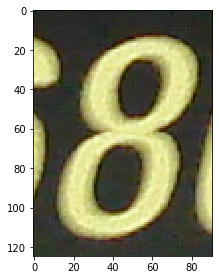

In [ ]:
io.imshow(eight_data[0])
eight_data[0].shape

## Convert and Resize the images

In [ ]:
#convert images to grayscale

def gray_scale(image_list):
    img_gray_list = []
    for i in image_list:
        conv=rgb2gray(i)
        img_gray_list.append(conv)
    #print(img_gray_list)
    return img_gray_list

In [ ]:
# Resize the images

def resize_data(img_gray_list,hight,width):
    final_data=[]
    for i in img_gray_list:
        final_data.append(resize(i, (hight,width)))
    return final_data

In [ ]:
# convert all dataset to grayscale
eight_data=gray_scale(eight_data)
g_data=gray_scale(g_data)
o_data=gray_scale(o_data)
q_data=gray_scale(q_data)

<ipython-input-7-1716b78a7575>:6: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  conv=rgb2gray(i)


(125, 91)

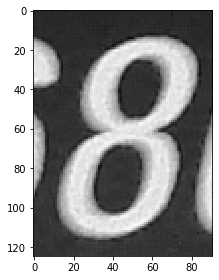

In [ ]:
io.imshow(eight_data[0])
eight_data[0].shape

In [ ]:
#resize all dataset
eight_data=resize_data(eight_data,40,40)
g_data=resize_data(g_data,40,40)
o_data=resize_data(o_data,40,40)
q_data=resize_data(q_data,40,40)

(40, 40)

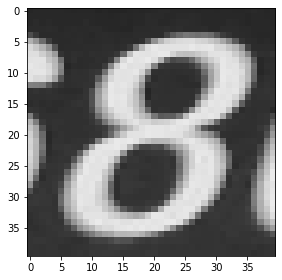

In [ ]:
io.imshow(eight_data[0])
eight_data[0].shape

# 1.2 Binary Classifiers

In [ ]:
#First we need to merge "o" & "q" data in one list also do that with "8" & "G"

g_8_data = eight_data+g_data
g_8_label = eight_label+g_label

o_q_data = o_data+q_data
o_q_label = o_label+q_label

#merge all the dataset

all_data = g_8_data+o_q_data
all_labels = g_8_label+o_q_label

In [ ]:
print("Length of Eight & G Data => ",len(g_8_data))

print("Length of O & Q Data => ",len(o_q_data))


Length of Eight & G Data =>  175
Length of O & Q Data =>  202


In [ ]:
#save the datasets as array and reshape them

ns_1, nx_1, ny_1 = np.array(g_8_data).shape
g_8_data=np.array(g_8_data).reshape((ns_1,nx_1*ny_1))

ns_2, nx_2, ny_2 = np.array(o_q_data).shape
o_q_data=np.array(o_q_data).reshape((ns_2,nx_2*ny_2))

>- We will split the datasets into train and test datasets and we will not create validation dataset because we will not need it,so we will use only train and test with ratio 70/30 and selecting images at random.

In [ ]:
#Split the dataset to train and test by => 70 / 30

X_train_g8 , X_test_g8 , y_train_g8, y_test_g8 = train_test_split(g_8_data , g_8_label , test_size=0.30, random_state=42)

X_train_oq , X_test_oq , y_train_oq, y_test_oq = train_test_split(o_q_data , o_q_label , test_size=0.30, random_state=42)

In [ ]:
print("-Length of Eight & G Trian Dataset => ",len(X_train_g8),"and the length of test dataset ->",len(X_test_g8))
print("-"*50)
print("-Length of O & Q Trian Dataset => ",len(X_train_oq),"and the length of test dataset ->",len(X_test_oq))

-Length of Eight & G Trian Dataset =>  122 and the length of test dataset -> 53
--------------------------------------------------
-Length of O & Q Trian Dataset =>  141 and the length of test dataset -> 61


# Train the models

In [ ]:
# logistic regression classifier to distinguish grayscale images of the letters '8' and 'g'
bin_clf_1 = LogisticRegression(max_iter=100, tol=0.1)
bin_clf_1.fit(X_train_g8, y_train_g8)

LogisticRegression(tol=0.1)

>**Predict the model with Train and Test datasets**

In [ ]:
y_pred_1_train = bin_clf_1.predict(X_train_g8)

y_pred_1_test = bin_clf_1.predict(X_test_g8)

In [ ]:
# logistic regression classifier to distinguish grayscale images of the letters 'o' and 'q'

bin_clf_2 = LogisticRegression(max_iter=100, tol=0.1)
bin_clf_2.fit(X_train_oq, y_train_oq)

LogisticRegression(tol=0.1)

>**Predict the model with Train and Test datasets**

In [ ]:
y_pred_2_train = bin_clf_2.predict(X_train_oq)

y_pred_2_test = bin_clf_2.predict(X_test_oq)

>**Plot the confusion matrix for train and test predictions**

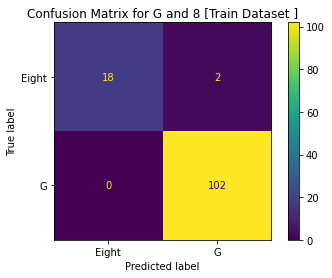

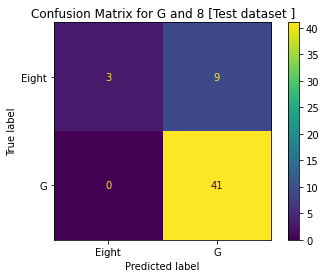

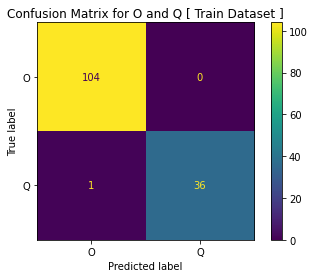

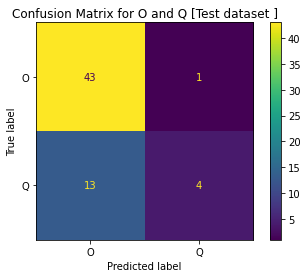

In [ ]:
plot_confusion_matrix(bin_clf_1,X_train_g8,y_train_g8)
plt.title("Confusion Matrix for G and 8 [Train Dataset ]")
plt.show()
plot_confusion_matrix(bin_clf_1,X_test_g8,y_test_g8)
plt.title("Confusion Matrix for G and 8 [Test dataset ]")
plt.show()
plot_confusion_matrix(bin_clf_2,X_train_oq,y_train_oq)
plt.title("Confusion Matrix for O and Q [ Train Dataset ]")
plt.show()
plot_confusion_matrix(bin_clf_2,X_test_oq,y_test_oq)
plt.title("Confusion Matrix for O and Q [Test dataset ]")
plt.show()

>**The simplest confusion matrix is for a two-class classification problem**

Class          | Positive Prediction | Negative Prediction 
---------------|---------------------|-------------------- 
Positive Class | True Positive (TP)  | False Negative (FN) 
Negative Class | False Positive (FP) | True Negative (TN)  

>- **Precision** = TruePositives / (TruePositives + FalsePositives)

>- **Recall** = TruePositives / (TruePositives + FalseNegatives)

>* **F-Measure** = (2 * Precision * Recall) / (Precision + Recall)

>**Calculate the accuracy, the recall,the precision and the F score** 

In [ ]:
#calculate the accuracy, the recall and the precision of two classifiers based on the
#confusion matrix of the training data, as well as on the testing data.

def report_all (y_true, y_pred):
    labels = (np.unique(y_true)).tolist()
    list_prec=[]
    list_recall=[]
    cm = confusion_matrix(y_true, y_pred)

    acc = np.mean(y_pred == y_true)

    recall = np.diag(cm) / np.sum(cm, axis = 1)
    prec = np.diag(cm) / np.sum(cm, axis = 0)

    f1 = (2*prec*recall)/ (prec + recall) 

    
    print ("\n{:<8} {:<15} {:<10} {:<20}".format('Class','Precision','Recall',"F score "))
    
    for i in labels:
        print ("\n{:<8} {:<15.3f} {:<10.3f} {:<20.3f}".format( i, prec[labels.index(i)], recall[labels.index(i)],f1[labels.index(i)]))
        list_prec.append(prec[labels.index(i)])
        list_recall.append(recall[labels.index(i)])
    print("\n- Accuracy ->",acc)
    print("\nThe average Precision -> ",sum(list_prec)/len(list_prec))
    print("\nThe average Recall -> ",sum(list_recall)/len(list_recall))

- This is also a function that calculate the precision, recall and F score

In [ ]:
#calculate the accuracy, the recall and the precision of two classifiers based on the
#confusion matrix of the training data, as well as on the testing data.

def report (y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)

    acc = np.mean(y_pred == y_true)

    prec_1 = cm[0][0]/(cm[0][0]+cm[1][0])

    recall_1 = cm[0][0]/(cm[0][0]+cm[0][1])

    prec_2 = cm[1][1]/(cm[1][1]+cm[0][1])

    recall_2 = cm[1][1]/(cm[1][1]+cm[1][0])

    f1 = (2*prec*recall)/ (prec + recall) 

    print("- Accuracy ->",acc)
    print("\n- Precision for Class_1 -> ",prec_1, "| Precision for Class_2 ->" , prec_2)
    print("\n- Recall for Class_1 -> ",recall_1 ,"   | Recall for Class_2 ->", recall_2)
    print("\n- F-score ->",f1)

>**Print the results for both Train and test (Accuracy,Precision,Recall and F score)**

In [ ]:
print("____________First Model________________\n")
report_all(y_train_g8, y_pred_1_train)
print("_______________________________________\n")
report_all(y_test_g8, y_pred_1_test)
print("____________Second Model_______________\n")
report_all(y_train_oq, y_pred_2_train)
print("_______________________________________\n")
report_all(y_test_oq, y_pred_2_test)

____________First Model________________


Class    Precision       Recall     F score             

Eight    1.000           0.900      0.947               

G        0.981           1.000      0.990               

- Accuracy -> 0.9836065573770492

The average Precision ->  0.9903846153846154

The average Recall ->  0.95
_______________________________________


Class    Precision       Recall     F score             

Eight    1.000           0.250      0.400               

G        0.820           1.000      0.901               

- Accuracy -> 0.8301886792452831

The average Precision ->  0.9099999999999999

The average Recall ->  0.625
____________Second Model_______________


Class    Precision       Recall     F score             

O        0.990           1.000      0.995               

Q        1.000           0.973      0.986               

- Accuracy -> 0.9929078014184397

The average Precision ->  0.9952380952380953

The average Recall ->  0.9864864864864865
_____________

**Calculate the predict proba for plot the ROC curve**

In [ ]:
y_scores_1_train = bin_clf_1.predict_proba(X_train_g8)[:,1]
y_scores_1_test = bin_clf_1.predict_proba(X_test_g8)[:,1]

y_scores_2_train =  bin_clf_2.predict_proba(X_train_oq)[:,1]
y_scores_2_test = bin_clf_2.predict_proba(X_test_oq)[:,1]

>**The ROC curves for each**

In [ ]:
def plot_roc_curve(fpr, tpr, label):
    plt.plot(fpr, tpr, linewidth=2.5, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    #plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend(loc="lower right")

 - AUC score ->:  1.0


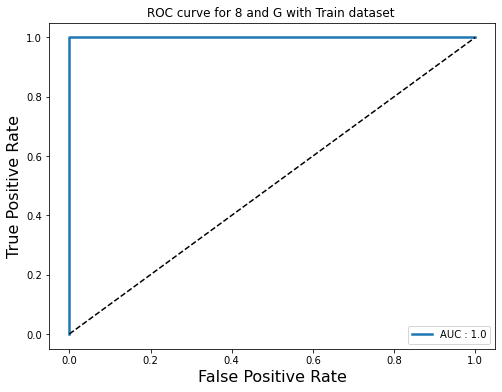

In [ ]:
#Plot the ROC curve for training dataset

# Binarize the output

enc = preprocessing.LabelEncoder()
y_train_g8 = enc.fit_transform(y_train_g8)

y_train_g8 = label_binarize(y_train_g8, classes=[0, 1])

#plot the ROC curve

fpr_g8, tpr_g8, thresholds_g8 = roc_curve(y_train_g8, y_scores_1_train)
print(' - AUC score ->: ', roc_auc_score(y_train_g8, y_scores_1_train))
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_g8, tpr_g8,("AUC : "+str(roc_auc_score(y_train_g8, y_scores_1_train))))
plt.title("ROC curve for 8 and G with Train dataset ")
plt.show()

 - AUC score ->:  0.556910569105691


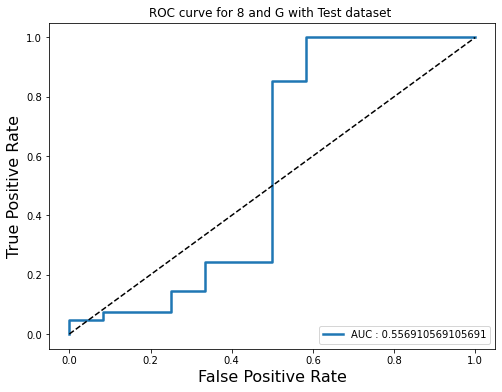

In [ ]:
#Plot the ROC curve for test dataset

# Binarize the output

enc = preprocessing.LabelEncoder()
y_test_g8 = enc.fit_transform(y_test_g8)

y_test_g8 = label_binarize(y_test_g8, classes=[0, 1])

#plot the ROC curve

fpr_g8, tpr_g8, thresholds_g8 = roc_curve(y_test_g8, y_scores_1_test)
print(' - AUC score ->: ', roc_auc_score(y_test_g8, y_scores_1_test))
plt.figure(figsize=(8, 6))
plt.title("ROC curve for 8 and G with Test dataset ")
plot_roc_curve(fpr_g8, tpr_g8,"AUC : "+str(roc_auc_score(y_test_g8, y_scores_1_test)))
plt.show()

- **Roc curve for "o" and "q"**

 - AUC score ->:  1.0


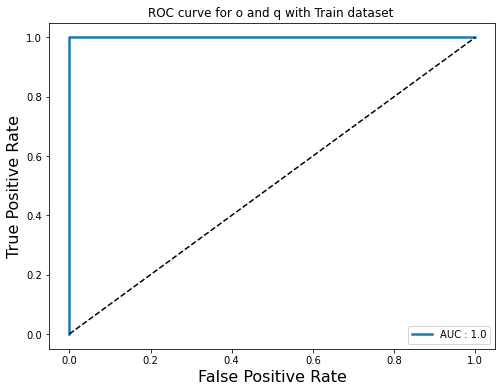

In [ ]:
##Plot the ROC curve for training dataset

# Binarize the output

enc = preprocessing.LabelEncoder()
y_train_oq = enc.fit_transform(y_train_oq)

y_train_oq = label_binarize(y_train_oq, classes=[0, 1])

#plot the ROC curve

fpr_oq, tpr_oq, thresholds_oq = roc_curve(y_train_oq, y_scores_2_train)

print(' - AUC score ->: ', roc_auc_score(y_train_oq, y_scores_2_train))
plt.figure(figsize=(8, 6))
plt.title("ROC curve for o and q with Train dataset ")
plot_roc_curve(fpr_oq, tpr_oq,"AUC : "+str(roc_auc_score(y_train_oq, y_scores_2_train)))
plt.show()

 - AUC score ->:  0.5133689839572192


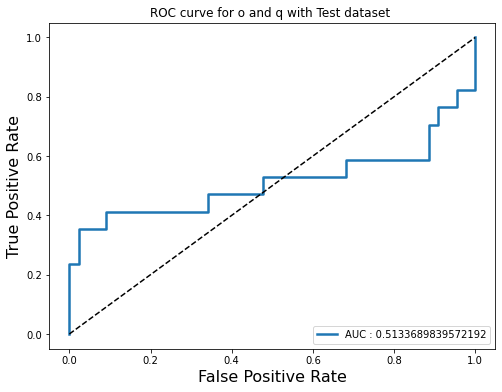

In [ ]:
#Plot the ROC curve for test dataset

# Binarize the output

enc = preprocessing.LabelEncoder()
y_test_oq = enc.fit_transform(y_test_oq)

y_test_oq = label_binarize(y_test_oq, classes=[0, 1])

#plot the ROC curve

fpr_oq, tpr_oq, thresholds_oq = roc_curve(y_test_oq, y_scores_2_test)

print(' - AUC score ->: ', roc_auc_score(y_test_oq, y_scores_2_test))
plt.figure(figsize=(8, 6))
plt.title("ROC curve for o and q with Test dataset ")
plot_roc_curve(fpr_oq, tpr_oq,"AUC : "+str(roc_auc_score(y_test_oq, y_scores_2_test)))
plt.show()

# An explanation of the results

>-  For First Classifier
    - From the results, we can see that the model can recognize the "G" very good it has a recall value -> 1.0, but it has difficulty in recognizing the "8" it has a recall value -> 0.25 all this results with test dataset.
>- For Second Classifier 
    - From the results, we can see that can recognize the "o" very good with recall -> 0.977 with test dataset, but it has difficulty in recognizing the "q" with recall -> 0.235 with the test dataset.

>**So, we can say that model has confused between the "G" and "8" so it cannot recognize "8" well. Also, the other model has the same issue, it cannot recognize the "q" well.**

>**With the train dataset the two models does not have any problem because we test them with the same data which it train on it so it give high accuracy**

# 1.3 Multiclass Classifier

In [ ]:
#save the datasets as array and reshape them

ns, nx, ny = np.array(all_data).shape
all_data=np.array(all_data).reshape((ns,nx*ny))


In [ ]:
#Split the dataset to train and test by => 70 / 30

X_train_all , X_test_all , y_train_all, y_test_all = train_test_split(all_data , all_labels , test_size=0.30, random_state=42)

In [ ]:
print("-Length of Trian Dataset => ",len(X_train_all),"and the length of test dataset ->",len(X_test_all))

-Length of Trian Dataset =>  263 and the length of test dataset -> 114


>- Becaue the logistic regression is a binary classifier so we will use One Vs One classifier to train with multi-class

In [ ]:
# logistic regression classifier to distinguish grayscale images of the all letters
from sklearn.multiclass import OneVsOneClassifier

bin_clf_all =  LogisticRegression(max_iter=1000, tol=0.1)
bin_clf_all.fit(X_train_all, y_train_all)

LogisticRegression(max_iter=1000, tol=0.1)

**Predict the model with Train and Test datasets**

In [ ]:
y_pred_all_train = bin_clf_all.predict(X_train_all)

y_pred_all_test = bin_clf_all.predict(X_test_all)

**Plot the confusion matrix for train and test predictions**

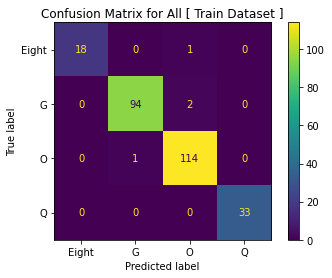

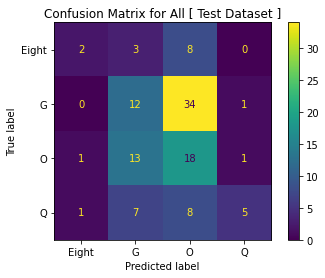

In [ ]:
plot_confusion_matrix(bin_clf_all,X_train_all,y_train_all)
plt.title("Confusion Matrix for All [ Train Dataset ]")
plt.show()

plot_confusion_matrix(bin_clf_all,X_test_all,y_test_all)
plt.title("Confusion Matrix for All [ Test Dataset ]")
plt.show()


**Print the results for both Train and test (Accuracy,Precision,Recall and F score)**

In [ ]:
report_all(y_train_all,y_pred_all_train)
print("_______________________________\n")
report_all(y_test_all,y_pred_all_test)


Class    Precision       Recall     F score             

Eight    1.000           0.947      0.973               

G        0.989           0.979      0.984               

O        0.974           0.991      0.983               

Q        1.000           1.000      1.000               

- Accuracy -> 0.9847908745247148

The average Precision ->  0.9909581646423752

The average Recall ->  0.9794598588863463
_______________________________


Class    Precision       Recall     F score             

Eight    0.500           0.154      0.235               

G        0.343           0.255      0.293               

O        0.265           0.545      0.356               

Q        0.714           0.238      0.357               

- Accuracy -> 0.32456140350877194

The average Precision ->  0.4554621848739496

The average Recall ->  0.2981787715830269


**Calculate the predict prop values for plot the ROC curve**

In [ ]:
y_scores_all_test =  bin_clf_all.predict_proba(X_test_all)
y_scores_all_train =  bin_clf_all.predict_proba(X_train_all)

**The ROC curves**

In [ ]:
# Compute ROC curve and ROC area for each class
def rooc (y_true,y_prop):
    lw = 2
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    # Binarize the output
    enc = preprocessing.LabelEncoder()
    y_train_alll = enc.fit_transform(y_true)
    y_train_alll = label_binarize(y_train_alll, classes=[0, 1, 2, 3])
    n_classes = y_train_alll.shape[1]
    
    classes= (np.unique(y_true)).tolist()
    plt.figure(figsize=(10, 8))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_train_alll[:, i], y_prop[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #plot the ROC curve

    colors = cycle(['aqua', 'darkorange', 'deeppink','cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        print("The AUC for class",classes[i]," -> ",roc_auc[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,label=("ROC curve for class",classes[i],'(area = %0.2f)' % roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The Receiver operating characteristic to multi-class')
    plt.legend(loc="lower right")

    plt.show()

The AUC for class Eight  ->  1.0
The AUC for class G  ->  0.998877245508982
The AUC for class O  ->  0.9990011750881316
The AUC for class Q  ->  1.0


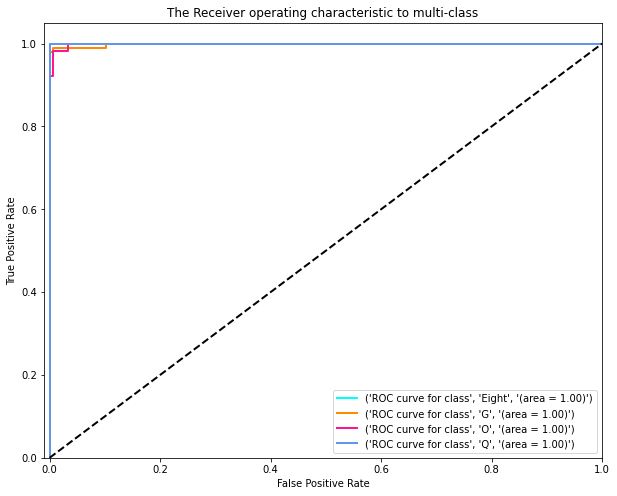

The AUC for class Eight  ->  0.5316070068545317
The AUC for class G  ->  0.5547792950142902
The AUC for class O  ->  0.533857089412645
The AUC for class Q  ->  0.6139272913466463


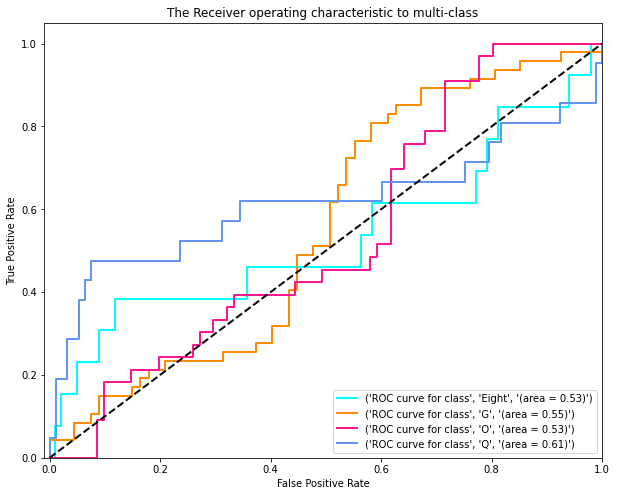

In [ ]:
rooc(y_train_all,y_scores_all_train)
rooc(y_test_all,y_scores_all_test)

# An explanation of the results

>- With the training dataset, does not have any problem with recognizing the 4 classes.

>- But, the test dataset has many problems:
	- It confused with "8" and ("o"&"G").
	- It is confused with "G" and "o"
	- It is confused with "q", "o" and "G"

>- And we can see that problem because the shape of these characters have some symmetry.